# S07 T01: Tasca dades, probabilitats i estadístiques

In [323]:
import math

import numpy as np
from numpy import random
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

### Exercici 1: Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

El dataset escollit és sobre els Jocs Olímpics de Tokyo 2020. S'hi pot veure el detall de totes les competicions que van tenir lloc, juntament amb l'edat, nacionalitat, classificació i medalles de cada atleta

Columnes: 
- Unnamed: 0 : # de fila
- Code: codi únic de cada atleta
- Name: nom de l'atleta (COGNOM Nom)
- Gender: Male o Female
- Age: edat dels atletes
- NOC: Comité Olímpic Nacional (206 en total)
- Country: país (206 en total)
- Discipline: cada codi indica una disciplina específica (46 en total)
- Sport: esport equivalent al codi de la columna anterior (46 en total)
- Event: tipus de competició (per equips, individual, masculina, femenina, etc.)
- Rank: classificacio de cada 'Event', sent 1 la 1a posició.
- Medal: medalla (Gold, Silver, Bronze o NaN)

In [354]:
# Carreguem el dataset i eliminem columnes que no volem:

olympics = pd.read_csv('/Users/deliagonzalezmata/Downloads/2020_Olympics_Dataset.csv', encoding = 'latin-1')

olympics = olympics.drop('Unnamed: 0', 1)
olympics = olympics.drop('Code', 1) # la columna Name conté els mateixos unics valors que Code
olympics = olympics.drop('NOC', 1) #la columna Country conté la mateixa informació de forma més clara
olympics = olympics.drop('Discipline', 1) #la columna Sport conté la mateixa informació de forma més clara

olympics.sample(5)

/var/folders/f1/1k69t1011n32zcq6vt7pt73c0000gn/T/ipykernel_1997/3270594272.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  olympics = olympics.drop('Unnamed: 0', 1)
/var/folders/f1/1k69t1011n32zcq6vt7pt73c0000gn/T/ipykernel_1997/3270594272.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  olympics = olympics.drop('Code', 1) # la columna Name conté els mateixos unics valors que Code
/var/folders/f1/1k69t1011n32zcq6vt7pt73c0000gn/T/ipykernel_1997/3270594272.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  olympics = olympics.drop('NOC', 1) #la columna Country conté la mateixa informació de forma més clara
/var/folders/f1/1k69t1011n32zcq6vt7pt73c0000gn/T/ipykernel_1997/3270594272.py:8: FutureWarning: In a future version of 

,Name,Gender,Age,Country,Sport,Event,Rank,Medal
2209,CHANDA Hellen,Female,23,Zambia,Football,Women Team,9.0,NaN
11934,SEEMANOVA Barbora,Female,21,Czech Republic,Swimming,Women's 50m Freestyle,NaN,NaN
10711,PRICE Tim,Male,42,New Zealand,Equestrian,Eventing Team,5.0,NaN
12919,TALAAT Mohamed,Male,32,Egypt,Equestrian,Jumping Team,NaN,NaN
11289,ROSE Shane,Male,48,Australia,Equestrian,Eventing Team,2.0,Silver


l'atribut escollit per realitzar els càlculs és l'edat (columna Age). Mitjançant la funció describe, ja podem veure que l'edat mitjana és 26,77 anys i la desviació estàndard és 5,61:

In [325]:
round(olympics.Age.describe(), 2)

count    15121.00
mean        26.77
std          5.61
min         12.00
25%         23.00
50%         26.00
75%         30.00
max         66.00
Name: Age, dtype: float64

De totes formes, procedirem a calcular cadascún dels valors per separat: 

#### Moda

la moda és el valor que més apareix en el nostre conjunt de dades. Hi ha varies formes de calcular-la: 
- mitjançant value_counts i agafant-ne el primer valor.
- mitjançant df.mode( )

veiem-ho:

In [326]:
olympics.Age.value_counts()[:1]

24    1322
Name: Age, dtype: int64

In [327]:
olympics.Age.mode()

0    24
dtype: int64

ambdós mètodes ens confirmen que la **moda** és l'edat de **24 anys**. Això vol dir que d'entre tots els atletes, el percentatge més gran de participants té 24 anys. 

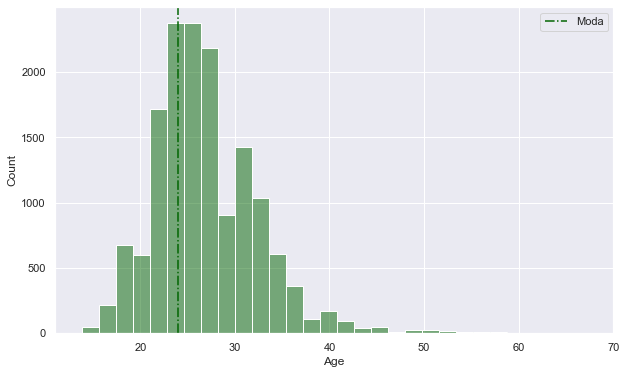

In [328]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.set(style="darkgrid")

sns.histplot(data=olympics, x="Age", bins = 30, color = 'darkgreen', alpha=0.5)
plt.xlim(11,70)
ax.axvline(int(olympics.Age.mode()), color="darkgreen", ls="-.", label="Moda")
ax.legend()

plt.show()

#### Mediana

la mediana és el valor que ocupa el lloc central del conjunt de dades. Es pot calcular de varies maneres: 
- Posant tots els números del conjunt dedades en ordre ascendent i després localitzar el número que està exactament al centre del conjunt.
- mitjançant pd.Series.median( )

In [329]:
ordered_age = olympics.Age.sort_values(ascending=True)
ordered_age.iloc[int(len(ordered_age)/2)]

26

In [330]:
olympics.Age.median()

26.0

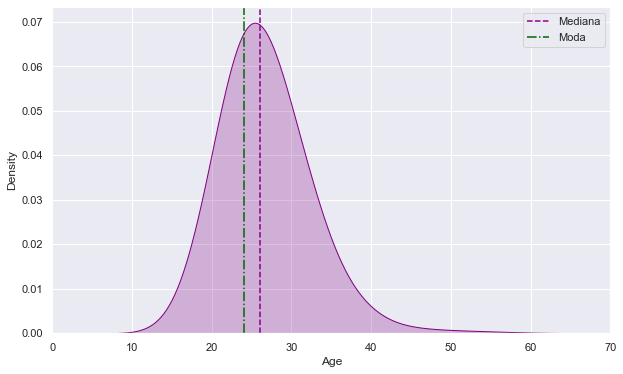

In [331]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.set(style="darkgrid")

sns.kdeplot(olympics.Age, shade=True, bw_method=0.5, color="purple")
plt.xlim(0,70)

ax.axvline(olympics.Age.median(), color="DarkMagenta", ls="--", label="Mediana")
ax.axvline(int(olympics.Age.mode()), color="darkgreen", ls="-.", label="Moda")
ax.legend();

plt.show()

#### Desviació Estàndard (σ)


La desviació estàndard mostra quanta variació hi ha respecte a la mitjana. 

Una desviació estàndard baixa indica que les dades tendeixen a ser propers a la mitjana, mentre que una desviació estàndard alta indica que les dades s'estenen al llarg d'un gran rang de valors.

Mitjançant la funció describe( ) hem comprovat que la desviació estàndard de l'edat dels atletes és de 5.61.

hi ha varies fòrmules de calcular-la:
- és l'arrel quadrada de la variança
- Calculant la distància de cadascuna de les edats dels participats respecte la mitjana, elevant-ho al quadrat, tornant a calcular la mitjana d'aquestes distàncies i calcular l'arrel quadrada.

In [332]:
import statistics
edat = olympics.Age
mitjana = statistics.mean(olympics.Age)

res = []
for x in edat:
    res.append((x - mitjana)**2)
std_age = round(np.sqrt(statistics.mean(res)),2)
print ('La desviació estàndard de l\'edat dels atletes és: ', std_age)

La desviació estàndard de l'edat dels atletes és:  5.61


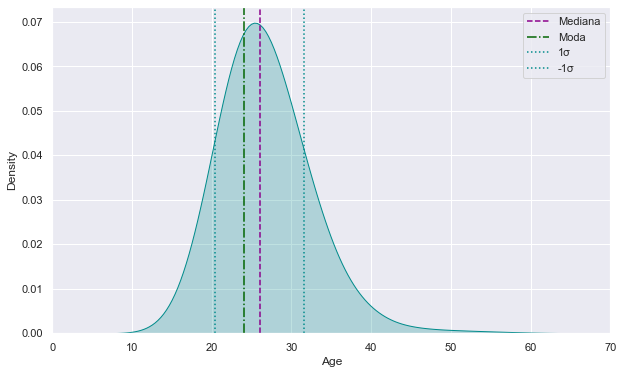

In [333]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.set(style="darkgrid")

sns.kdeplot(olympics.Age, shade=True, bw_method=0.5, color="darkcyan")
plt.xlim(0, 70)

ax.axvline(olympics.Age.median(), color="DarkMagenta", ls="--", label="Mediana")
ax.axvline(int(olympics.Age.mode()), color="darkgreen", ls="-.", label="Moda")
ax.axvline((olympics.Age.median() + std_age), color="darkcyan", ls="dotted", label="1σ")
ax.axvline((olympics.Age.median() - std_age), color="darkcyan", ls="dotted", label="-1σ")
ax.legend();

plt.show()

#### Mitjana Aritmètica

La Mitjana s'obté sumant els valors de totes les dades i dividint-lo pel nombre d'elements del conjunt.

Com ja hem vist en la funció describe( ), la mitjana d'edat dels participants és 26,77 anys. 

In [334]:
mean = round(sum(olympics.Age) / len(olympics.Age), 2)
mean

26.77

In [335]:
round(olympics.Age.mean(), 2)

26.77

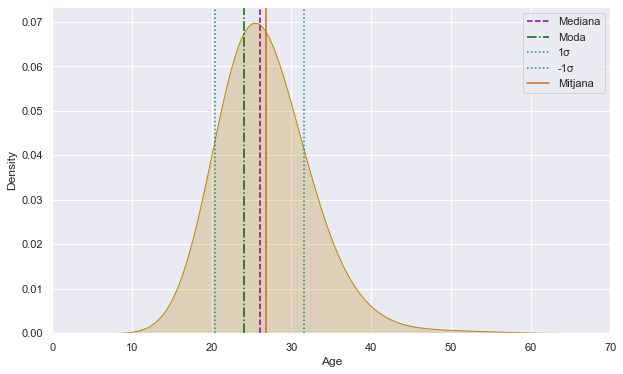

In [336]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.set(style="darkgrid")

sns.kdeplot(olympics.Age, shade=True, bw_method=0.5, color="darkgoldenrod")
plt.xlim(0,70)

ax.axvline(olympics.Age.median(), color="DarkMagenta", ls="--", label="Mediana")
ax.axvline(int(olympics.Age.mode()), color="darkgreen", ls="-.", label="Moda")
ax.axvline((olympics.Age.median() + std_age), color="darkcyan", ls="dotted", label="1σ")
ax.axvline((olympics.Age.median() - std_age), color="darkcyan", ls="dotted", label="-1σ")
ax.axvline(olympics.Age.mean(), color="chocolate", ls="-", label="Mitjana")
ax.legend();

plt.show()

### Exercici 2: Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

els dos atributs seleccionats son les columnes "Age" i "Rank".
Intentarem esbrinar si existeix algun tipus de correlació entre ells. 

La funció de correlació no te en compte aquells registres de la columna Rank que son null (3.766 valors). Per tant, no cal eliminar-los:

In [337]:
olympics.Rank.isnull().value_counts()

False    11355
True      3766
Name: Rank, dtype: int64

In [338]:
olympics.Age.corr(olympics.Rank)

0.12246086613685479

El valor del coeficient de correlació(r) varia entre [-1,+1]:

- Si r = 1: **correlació positiva perfecta**. indica una dependència total entre les dues variables: quan una d'elles augmenta, l'altra també ho fa en proporció constant.
- Si 0 <r <1, hi ha una **correlació positiva**.
- Si r = 0, no existeix relació lineal. 
- Si -1 <r <0, hi ha una **correlació negativa**.
- Si r = -1, hi ha una **correlació negativa perfecta**. relació inversa entre les dues variables: quan una d'elles augmenta, l'altra disminueix en proporció constant.

En el nostre cas, el coeficient de correlació obtingut entre les dues variables és de 0,122, el que indica una correlació positiva però no molt forta, ja que el nombre és proper a 0. Té sentit pensar que si l'edat augmenta és més probable que la posició en el rànquing o classificació final també sigui més alta.

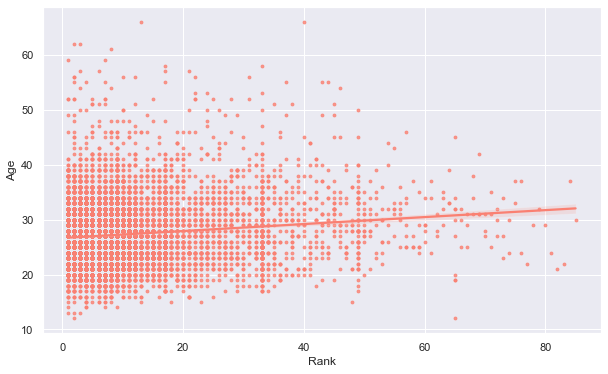

In [339]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.regplot(x=olympics["Rank"], y=olympics["Age"], marker='o', color='salmon', scatter_kws={'s':8})

plt.show()

### Exercici 3: Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

El conjunt de dades escollit només té 2 columnes numèriques - Age i Rank - (la resta son categòriques).

In [355]:
olympics.corr(method='pearson')

,Age,Rank
Age,1.000000,0.122461
Rank,0.122461,1.000000


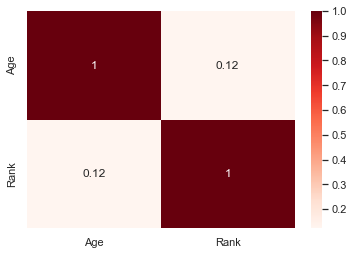

In [356]:
sns.heatmap(olympics.corr(method='pearson'), annot = True, cmap = 'Reds');

Amb l'objectiu de tenir més dades per analitzar, crearem més columnes numèriques a partir de les columnes categòriques del nostre dataset:

In [357]:
def medalla (Medal):
    if 'Gold' in str(Medal):
        return 1
    elif 'Silver' in str(Medal):
        return 2
    elif 'Bronze' in str(Medal):
        return 3
    else:
        return 0

olympics['Medalla'] = olympics.apply(lambda x: medalla(x['Medal']), axis=1)
olympics['Genere'] = [0 if x == 'Female' else 1 for x in olympics.Gender]
olympics.sample(15)

,Name,Gender,Age,Country,Sport,Event,Rank,Medal,Medalla,Genere
7676,LKHAGVASUREN Sosorbaram,Female,20,Mongolia,Judo,Women -52 kg,9.0,NaN,0,0
3011,DEAN Clark,Male,21,United States,Rowing,Men's Four Team,5.0,NaN,0,1
4597,GONZALEZ Tomas,Male,35,Chile,Artistic Gymnastics,Men's Floor Exercise,NaN,NaN,0,1
3223,DJAKOVIC Antonio,Male,18,Switzerland,Swimming,Men's 4 x 100m Freestyle Relay Team,NaN,NaN,0,1
3177,DIAZ Valentina,Female,20,Chile,Football,Women Team,11.0,NaN,0,0
416,AL-WIR Amro,Male,20,Jordan,Swimming,Men's 100m Breaststroke,NaN,NaN,0,1
4880,HADADI Ehsan,Male,36,Iran,Athletics,Men's Discus Throw,NaN,NaN,0,1
2933,de DEUS Leonardo,Male,30,Brazil,Swimming,Men's 200m Butterfly,6.0,NaN,0,1
8345,MATTEK-SANDS Bethanie,Female,36,United States,Tennis,Women's Doubles Team,5.0,NaN,0,0
7757,LOPEZ Juan Martin,Male,36,Argentina,Hockey,Men Team,7.0,NaN,0,1


In [358]:
olympics.corr(method='pearson')

,Age,Rank,Medalla,Genere
Age,1.000000,0.122461,0.026439,0.092658
Rank,0.122461,1.000000,-0.374376,0.016702
Medalla,0.026439,-0.374376,1.000000,-0.008292
Genere,0.092658,0.016702,-0.008292,1.000000


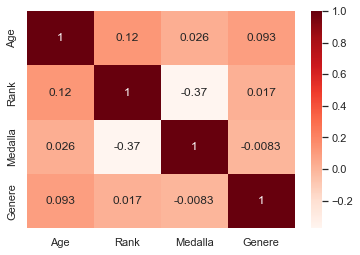

In [359]:
sns.heatmap(olympics.corr(method='pearson'), annot = True, cmap = 'Reds');

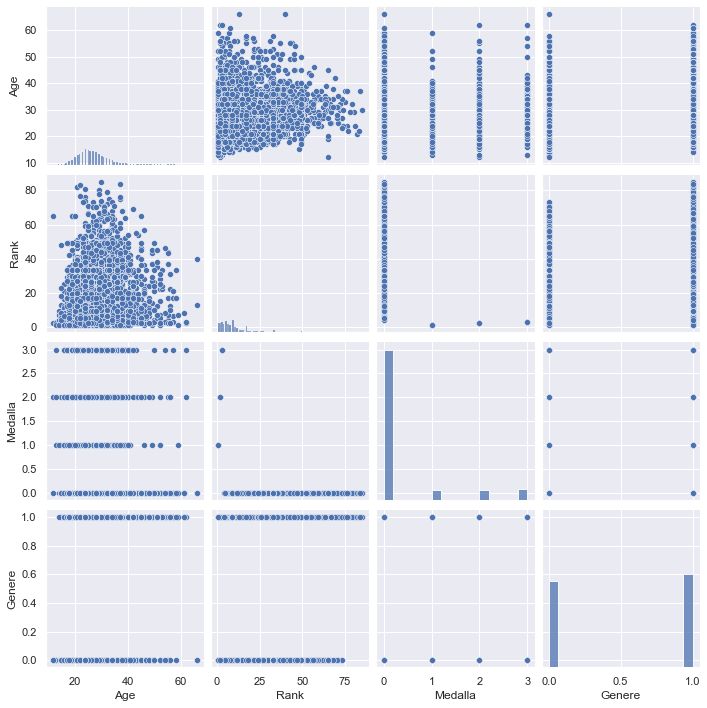

In [365]:
sns.pairplot(olympics)
plt.show()

### Exercici 4: Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

Tornarem a utilitzar l'atribut 'Age'.

#### Mitjana geomètrica

La mitjana geomètrica d'un conjunt de nombres és l'arrel n-èsima del producte de tots els nombres.

la mitjana geomètrica és semple menor o igual a la mitjan aritmètica. I presenta certs avantatges e inconvenients respecte la mitjana aritmètica:

Avantatges:
- Considera tots els valors de la distribució
- Es menys sensible que la mitjana aritmètica als valors extrems.

Inconvenients:
- És de significat estadístic menys intuitiu que la mitjana aritmètica.
- És més difícil de calcular. 

In [349]:
from scipy.stats.mstats import gmean
mitjana_geometrica = round(gmean(olympics.Age),2)
  
print("La Mitjana geomètrica de l'atribut Edat és :", mitjana_geometrica)

La Mitjana geomètrica de l'atribut Edat és : 26.22


Efectivament, es compleix la propietat anteriorment esmenada de que la mitjana geomètrica (26,22) **<** mitjana aritmètica (26,77)

#### Mitjana harmonica 


Avantatges:
- Els valors extrems (molt grans) influeixen poc.
- És senzilla de calcular.

Inconvenients:
- Els valors propers a zero influeixen molt en el seu valor.
- En ser sensible al canvi d'escala en les unitats, no es pot utilitzar per comparar variables que es mesurin en unitats diferents.

La mitjana harmonica és també una de les tres mitjanes pitagòriques, juntament amb la mitjana aritmètica i la geomètrica. La mitjana harmònica és sempre la menor de les tres mitjanes, mentre que la mitjana aritmètica és sempre la més gran de les 3 i la mitjana geomètrica està entremig.

In [350]:
import statistics

mitjana_harmonica = round(statistics.harmonic_mean(olympics.Age),2)
print("La Mitjana harmònica de l'atribut Edat és: % s " % (mitjana_harmonica))

La Mitjana harmònica de l'atribut Edat és: 25.71 


observem que, un altre cop, es compleix la condició:

In [351]:
print (mean, '>', mitjana_geometrica, '>', mitjana_harmonica)

26.77 > 26.22 > 25.71


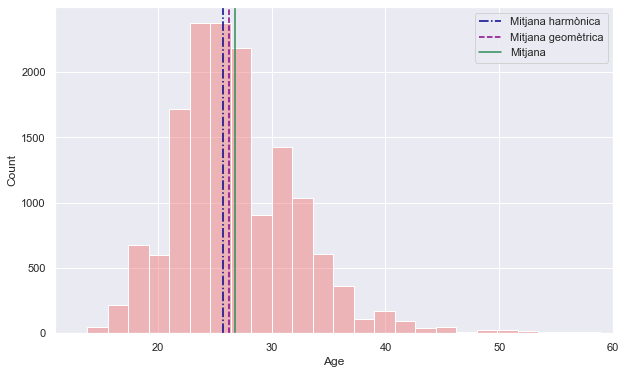

In [364]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.set(style="darkgrid")

sns.histplot(data=olympics, x="Age", bins = 30, color = 'lightcoral', alpha=0.5)
plt.xlim(11,60)

ax.axvline(mitjana_harmonica, color="darkblue", ls="-.", label="Mitjana harmònica")
ax.axvline(mitjana_geometrica, color="DarkMagenta", ls="--", label="Mitjana geomètrica")
ax.axvline(olympics.Age.mean(), color="seagreen", ls="-", label="Mitjana")
ax.legend();

plt.show()